In [11]:
from importlib.resources import path
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
def f(t):
    return np.exp(-0.1*t)*np.sin(t)

In [13]:
def df(t):
    return -0.1*np.exp(-0.1*t)*np.sin(t)+np.exp(-0.1*t)*np.cos(t)

In [14]:
def diferencial(x, f,h=0.025):
    d=(f(x+h)-f(x))/h
    
    return d
    

In [15]:
l=2*np.pi
t=np.linspace(-l,l,100)
fv=f(t)

In [16]:
fft=np.fft.fft(fv)

N=len(fft)
omega=2*np.pi/l

w=omega*np.arange(-N/2.,N/2.)

w=np.fft.fftshift(w)

In [17]:
DFFT=w*fft*(1j)

DerivadaF=np.real(np.fft.ifft(DFFT))

In [19]:
drf=[]
H=100/(4*np.pi)
for ti in t:
    x=diferencial(ti,f,h=H)
    drf.append(x)

drf=np.array(drf)

In [20]:
daf=df(t)

c:\users\frawo\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


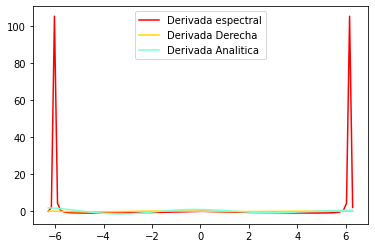

In [21]:
plt.plot(t,DFFT, color="red", label="Derivada espectral")
plt.plot(t,drf, color="gold", label="Derivada Derecha")
plt.plot(t,daf, color="aquamarine",label="Derivada Analitica")
plt.legend()